<pre><b>Author</b>: Ashlynn Wimer
<b>Date</b>: 3/4/2024
</pre>

This notebook attempts to verify the integrity of my labeling through a basic word counting approach.

In [2]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import wordcloud

In [3]:
BACKGROUND_COLOR = '#F0ECE2' # soft-white

In [4]:
corpus = pd.read_csv('../data/fully_labeled_data.csv', index_col='Unnamed: 0')

# Split corpus
trans_posts = corpus[corpus['transRelated'] == 1]
non_trans_posts = corpus.drop(trans_posts.index).reset_index()

We're going to use the clean content column for this, which should also save on compute power.

In [5]:
all_trans_posts = " ".join(trans_posts['clean_content'].tolist())
all_non_trans_posts = " ".join(non_trans_posts['clean_content'].apply(str).tolist())

Let's drop all punctuation, and assume words are separated if split by a space.

In [6]:
# remove punctuation, limit to one space, lowercase all
all_non_trans_posts = re.sub(r"[^\w\s']", ' ', all_non_trans_posts)
all_non_trans_posts = re.sub(r"'", '', all_non_trans_posts)
all_non_trans_posts = re.sub(r'\s+', ' ', all_non_trans_posts).lower()

all_trans_posts = re.sub(r"[^\w\s']", ' ', all_trans_posts)
all_trans_posts = re.sub(r"'", '', all_trans_posts)
all_trans_posts = re.sub(r'\s+', ' ', all_trans_posts).lower()

non_trans_posts_tokens = all_non_trans_posts.split(' ')
trans_posts_tokens = all_trans_posts.split(' ')

In [7]:
#nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))


trans_counts = {}
for word in trans_posts_tokens:
    if word not in stop_words:
        trans_counts[word] = trans_counts.get(word, 0) + 1

non_trans_counts = {}
for word in non_trans_posts_tokens:
    if word not in stop_words:
        non_trans_counts[word] = non_trans_counts.get(word, 0) + 1

# Used to generate a larger stop word list.
all_word_counts = {}
for word in (trans_posts_tokens + non_trans_posts_tokens):
    if word not in stop_words:
        all_word_counts[word] = all_word_counts.get(word, 0) + 1

trans_counts_t = sorted(trans_counts.items(), key=lambda x: x[1], reverse=True)
non_trans_counts_t = sorted(non_trans_counts.items(), key=lambda x: x[1], reverse=True)
all_word_counts_t = sorted(all_word_counts.items(), key=lambda x: x[1], reverse=True)


In [8]:
trans_counts['diy'], non_trans_counts['diy']

(358, 66)

Let's expand our stop word list by, within and across our samples, adding non-substantive but common words to it.

In [9]:
trans_counts_t[:50]

[('like', 19465),
 ('im', 13400),
 ('dont', 10831),
 ('trans', 9740),
 ('people', 9302),
 ('get', 8913),
 ('women', 8050),
 ('would', 7541),
 ('think', 7128),
 ('want', 6851),
 ('even', 6215),
 ('really', 5632),
 ('men', 5392),
 ('youre', 5255),
 ('one', 5051),
 ('know', 5011),
 ('woman', 4993),
 ('cis', 4929),
 ('fuck', 4828),
 ('look', 4767),
 ('feel', 4655),
 ('make', 4312),
 ('man', 4204),
 ('also', 4112),
 ('never', 4068),
 ('hrt', 4037),
 ('still', 3901),
 ('way', 3818),
 ('male', 3692),
 ('much', 3628),
 ('pass', 3601),
 ('girl', 3593),
 ('thats', 3568),
 ('time', 3539),
 ('go', 3486),
 ('good', 3396),
 ('cant', 3057),
 ('see', 3039),
 ('shit', 3014),
 ('actually', 2995),
 ('life', 2978),
 ('tranny', 2957),
 ('need', 2936),
 ('fucking', 2934),
 ('ive', 2925),
 ('could', 2910),
 ('trannies', 2782),
 ('body', 2694),
 ('gay', 2690),
 ('going', 2679)]

In [10]:
add_stop_word = [w for w, c in trans_counts_t[:3]]

In [11]:
non_trans_counts_t[:50]

[('like', 18044),
 ('im', 10974),
 ('dont', 9391),
 ('get', 7440),
 ('people', 7325),
 ('one', 6159),
 ('think', 6121),
 ('would', 5612),
 ('really', 5383),
 ('want', 5312),
 ('good', 5182),
 ('youre', 4901),
 ('know', 4884),
 ('even', 4440),
 ('thats', 3984),
 ('time', 3969),
 ('also', 3541),
 ('need', 3468),
 ('much', 3458),
 ('love', 3453),
 ('go', 3431),
 ('make', 3406),
 ('never', 3329),
 ('shit', 3186),
 ('fuck', 3122),
 ('fucking', 2912),
 ('cant', 2909),
 ('look', 2897),
 ('feel', 2888),
 ('still', 2822),
 ('someone', 2785),
 ('lol', 2761),
 ('way', 2748),
 ('see', 2746),
 ('something', 2705),
 ('anon', 2617),
 ('gay', 2600),
 ('life', 2581),
 ('yeah', 2575),
 ('actually', 2568),
 ('sex', 2567),
 ('could', 2553),
 ('post', 2529),
 ('right', 2523),
 ('going', 2502),
 ('got', 2470),
 ('men', 2462),
 ('say', 2449),
 ('ive', 2383),
 ('thing', 2330)]

In [12]:
add_stop_word = add_stop_word + [w for w, c in non_trans_counts_t[:19]]

In [13]:
all_word_counts_t

[('like', 37509),
 ('im', 24374),
 ('dont', 20222),
 ('people', 16627),
 ('get', 16353),
 ('think', 13249),
 ('would', 13153),
 ('want', 12163),
 ('one', 11210),
 ('really', 11015),
 ('even', 10655),
 ('trans', 10295),
 ('youre', 10156),
 ('know', 9895),
 ('women', 9498),
 ('good', 8578),
 ('fuck', 7950),
 ('men', 7854),
 ('make', 7718),
 ('look', 7664),
 ('also', 7653),
 ('thats', 7552),
 ('feel', 7543),
 ('time', 7508),
 ('never', 7397),
 ('much', 7086),
 ('go', 6917),
 ('still', 6723),
 ('way', 6566),
 ('need', 6404),
 ('man', 6278),
 ('shit', 6200),
 ('cant', 5966),
 ('fucking', 5846),
 ('see', 5785),
 ('woman', 5748),
 ('actually', 5563),
 ('life', 5559),
 ('could', 5463),
 ('ive', 5308),
 ('gay', 5290),
 ('love', 5290),
 ('going', 5181),
 ('cis', 5166),
 ('something', 5098),
 ('someone', 4954),
 ('got', 4900),
 ('sex', 4868),
 ('right', 4861),
 ('thing', 4797),
 ('better', 4699),
 ('say', 4687),
 ('girl', 4648),
 ('yeah', 4501),
 ('bad', 4496),
 ('doesnt', 4466),
 ('post', 4411),

In [33]:
add_stop_word = add_stop_word + [w for w, c in all_word_counts_t[:11]]
stop_words = set(list(stop_words) + add_stop_word)

# For usage elsewhere
#with open('../data/stospwords.txt', 'w') as f:
#    f.write(str(list(stop_words)))

We want to get word clouds, but we need to make sure we actually filter out at least the basic stop words, so let's make a new token set.

In [15]:
trans_posts_tokens_sw = []
non_trans_posts_tokens_sw = []
all_posts_tokens_sw = []

for tkn in trans_posts_tokens:
    if tkn not in stop_words:
        trans_posts_tokens_sw.append(tkn)

for tkn in non_trans_posts_tokens:
    if tkn not in stop_words:
        non_trans_posts_tokens_sw.append(tkn)

for tkn in (trans_posts_tokens + non_trans_posts_tokens):
    if tkn not in stop_words:
        all_posts_tokens_sw.append(tkn)


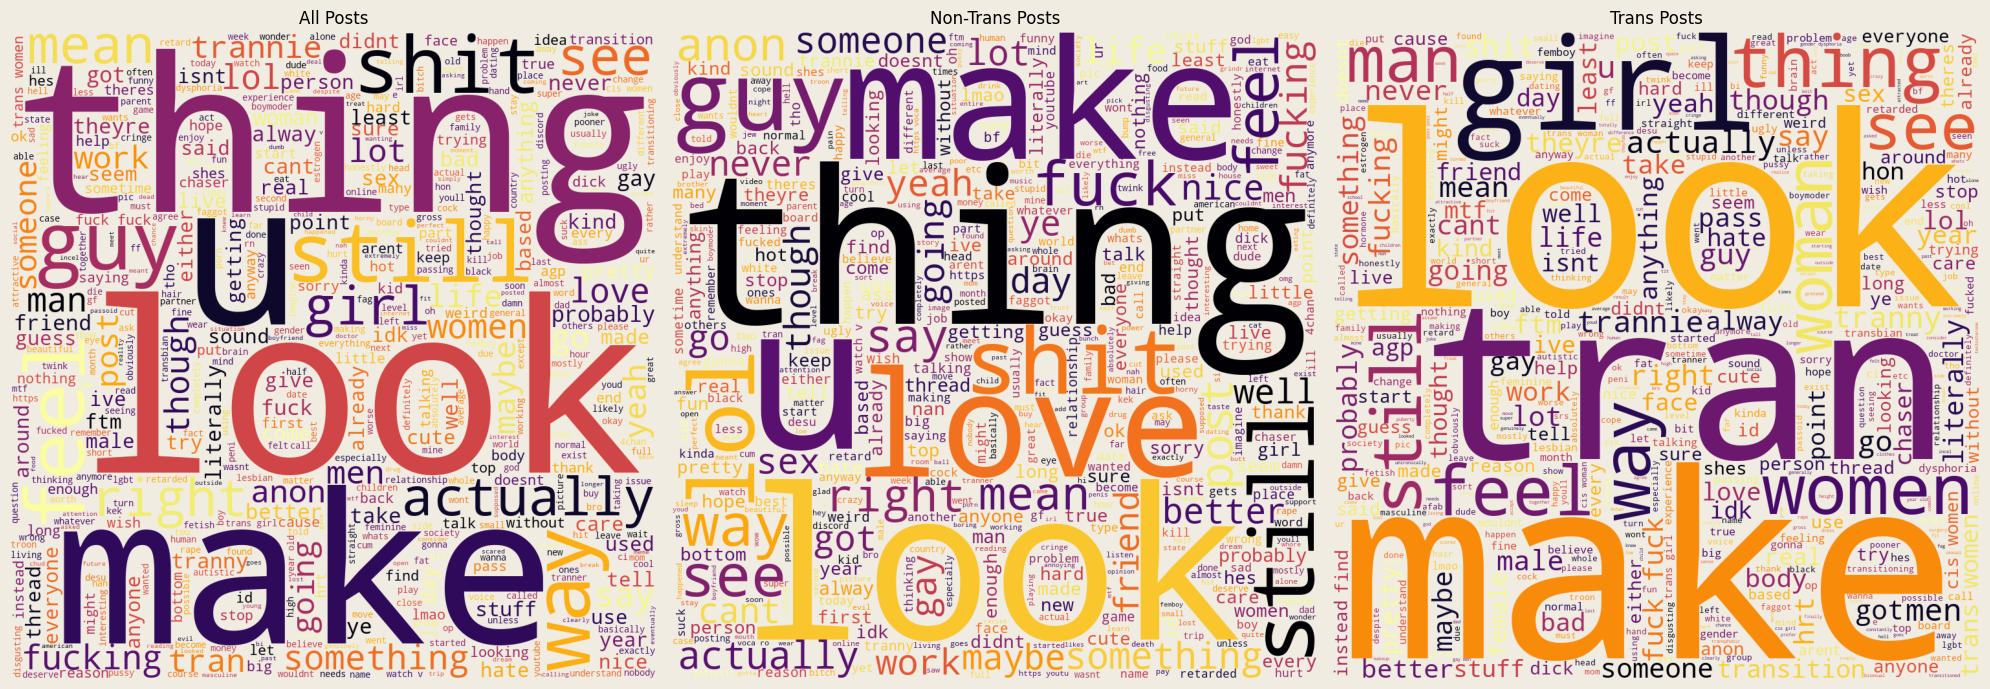

In [20]:
fig, axes = plt.subplots(ncols=3, figsize=(20,10))
fig.set_facecolor(BACKGROUND_COLOR)

wc = wordcloud.WordCloud(background_color=BACKGROUND_COLOR,
                    max_words=500, width=1000, height=1000,
                    mode='RGBA', colormap='inferno')\
                    .generate(' '.join(all_posts_tokens_sw))
axes[0].imshow(wc)
axes[0].set_title('All Posts')
axes[0].axis('off')

wc1 = wordcloud.WordCloud(background_color=BACKGROUND_COLOR,
                    max_words=500, width=1000, height=1000,
                    mode='RGBA', colormap='inferno')\
                    .generate(' '.join(non_trans_posts_tokens_sw))
axes[1].imshow(wc1)
axes[1].set_title('Non-Trans Posts')
axes[1].axis('off')

wc2 = wordcloud.WordCloud(background_color=BACKGROUND_COLOR,
                    max_words=500, width=1000, height=1000,
                    mode='RGBA', colormap='inferno')\
                    .generate(' '.join(trans_posts_tokens_sw))
axes[2].imshow(wc2)
axes[2].set_title('Trans Posts')
axes[2].axis('off')

plt.tight_layout()


This seems like evidence that our trans category is at least capturing _some_ aspect of transness, as it's word cloud is filled with trans words whereas our other wordclouds seem to be less trans related. 

Let's run a few other basic verification tests. In particular, our usage of non-fine-tuned chatgpt means that our pipeline may have missed trans related posts which used slang. We pick two slang terms common on 4chan but less common elsewhere for this: AGP, and IWNBAW. 

In [138]:
non_trans_counts['agp'], trans_counts['agp']

(332, 1468)

AGP is predominately in the trans_counts dataset, although any post with "AGP" in it is certainly a trans related post.

In [139]:
non_trans_counts['iwnbaw'], trans_counts['iwnbaw']

(14, 20)

Ooo, the plot thickens! We have many fewer trans tokens than non-trans tokens, so this is almost certainly a significant difference. On the other hand, it's also a sign that our model is slightly missing nuance.

While we're at it, let's get a fuller list of "iwn" words:

In [142]:
keys = set(list(non_trans_counts.keys()) + list(trans_counts.keys()))

iwn_tkns = set()
for key in keys:
    if 'iwn' in key:
        iwn_tkns.add(key)

iwn_tkns

{'6iwnbaw',
 'anonetteiwnbaw',
 'bumpiwnbaw',
 'factorsiwnbaw',
 'honiwn',
 'iwn',
 'iwnab',
 'iwnabwhat',
 'iwnb',
 'iwnba',
 'iwnbam',
 'iwnbarwim',
 'iwnbath',
 'iwnbaw',
 'iwnbawiwnbacwiwnbarwiwnbl',
 'iwnbawwhy',
 'iwndag',
 'iwnmi',
 'meiwn',
 'theoryiwnbaw',
 'tiwnhon',
 'tiwnk',
 'trannyiwn'}

This has proven to be a daily reminder that I need to figure out why I keep loses spaces between words. Regardless, it's interetsing to see that most of these are variations on "iwnbaw" or "iwnbab"; the term seems surprisingly homogenous!

Lastly, lets pull the above count comparisons into a quick and dirty table for the presentation tomorrow. In particular, let's check 'trans', 'chaser', 'hrt', 'agp', 'hsts', and 'iwnbaw'. 

In [157]:
words = ['trans' ,'hrt', 'agp', 'hsts', 'iwnbaw']
cnt_dicts = [all_word_counts, non_trans_counts, trans_counts]

counts = []
for cnt_dict in cnt_dicts:
    to_append = []
    for word in words:
        to_append.append(cnt_dict[word])
    counts.append(to_append)

pd.DataFrame(counts, columns=words, index=['All', 'Non-Trans', 'Trans'])

,trans,hrt,agp,hsts,iwnbaw
All,10295,4285,1800,576,34
Non-Trans,555,248,332,133,14
Trans,9740,4037,1468,443,20


In [166]:
words = ['trans' ,'hrt', 'agp', 'hsts', 'iwnbaw']
cnt_dicts = [all_word_counts, non_trans_counts, trans_counts]
token_totals = [len(non_trans_posts_tokens_sw + trans_posts_tokens_sw), len(non_trans_posts_tokens_sw), len(trans_posts_tokens_sw)]

counts = []
for cnt_dict, tkn_total in zip(cnt_dicts, token_totals):
    to_append = []
    for word in words:
        to_append.append(cnt_dict[word] / tkn_total)
    counts.append(to_append)

pd.DataFrame(counts, columns=words, index=['All', 'Non-Trans', 'Trans'])

,trans,hrt,agp,hsts,iwnbaw
All,0.004856,0.002021,0.000849,0.000272,0.000016
Non-Trans,0.000541,0.000242,0.000323,0.000130,0.000014
Trans,0.008905,0.003691,0.001342,0.000405,0.000018


Okay, awesome! These tables support the idea that our classifier is doing fairly well, but probably missing some nuance on the edge.

Okay okay okay last check, I'm really curious:

In [167]:
all_word_counts['diy'], non_trans_counts['diy'], trans_counts['diy']

(424, 66, 358)

Interesting result discovered!!

Let's do one last test and see which threads have the most trans related posts.

In [30]:
print(trans_posts['subject'].value_counts()[:10])

subject
/mtfg/ male to female general          877
/lesgen/ - Lesbian General             685
/mtfg/ - Male to Female Genera(...)    659
/mmg/ manmoder general                 525
/repgen/ - repressor general           393
/fbg/ - Femboy General                 332
/agpgen/ - don’t let the threa(...)    279
/mtfg/                                 277
/gaygen/                               260
34610116                               253
Name: count, dtype: int64


/mtfg/, /mtfg/, /mmg/, /repgen/, /fbg/, /agpgen/, and /mtfg/ all make sense! /lesgen/ _could_ be concerning, but isn't too concerning as many trans women are also lesbians (and hence would be expected to frequent that half of the board) 